In [54]:
import pandas as pd
import os
import librosa
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [17]:
df = pd.read_csv('metadata/UrbanSound8K.csv')

In [187]:
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [18]:
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]
list9=[]
list10=[]

fold1 = 'audio/fold1'
list1 = os.listdir(fold1)

fold2 = 'audio/fold2'
list2 = os.listdir(fold2)

fold3 = 'audio/fold3'
list3 = os.listdir(fold3)

fold4 = 'audio/fold4'
list4 = os.listdir(fold4)

fold5 = 'audio/fold5'
list5 = os.listdir(fold5)

fold6 = 'audio/fold6'
list6 = os.listdir(fold6)

fold7 = 'audio/fold7'
list7 = os.listdir(fold7)

fold8 = 'audio/fold8'
list8 = os.listdir(fold8)

fold9 = 'audio/fold9'
list9 = os.listdir(fold9)

fold10 = 'audio/fold10'
list10 = os.listdir(fold10)

lista = list1 + list2 + list3 + list4 + list5 + list6 + list7 + list8 + list9 + list10

In [19]:
#ha excecoes: audio/fold[]/.DS_store

def path_class(filename):
    excerpt = df[df['slice_file_name'] == filename]
    
    if not excerpt.empty:
        path_name = os.path.join('audio', 'fold'+str(excerpt.fold.values[0]), filename)
        return path_name
    
    else:
        return None

In [5]:
path_list=[]
for i in lista:
    p = path_class(i)
    if (p!=None):
        path_list.append(p)

# Com MFCCs

In [209]:
path_list = ['audio/fold7/99812-1-4-0.wav']

In [210]:
sr = 44100
n_mfcc = 40
hop_length=round(sr*0.0125)
win_length=round(sr*0.023)
n_fft=2**14
mfcc_time_size = 4*sr//hop_length+1

In [211]:
dataset=np.zeros(shape=[len(path_list),4*sr])
dataset_mfcc=np.zeros(shape=[len(path_list),n_mfcc,mfcc_time_size])

In [212]:
resample_sr = 44100 #sample rate padrao
desired = 4.0 #tempo do audio padrao
i=0
for f in path_list:
    f = f'{f}'
    y, previous_sr = librosa.load(f, sr=None)
    y_resample =librosa.resample(y, orig_sr=previous_sr, target_sr=sr)
    
    if len(y_resample)<4*sr:
        # Calculate the number of times to repeat the audio
        repeat = int(np.ceil(desired * sr / len(y_resample)))

        # Repeat the audio
        y_extended = np.tile(y_resample, repeat)

        # Trim the array to the desired duration
        y_extended = y_extended[:int(desired * sr)]

    else:
        y_extended = y_resample
        
############################################################################################################################
    # Normalização min-max
    min_val = np.min(y_extended)
    max_val = np.max(y_extended)
    ynormalized = (y_extended - min_val) / (max_val - min_val)
        
    #Normalizacao z-score
    media = np.mean(y_extended)
    desvio_padrao = np.std(y_extended)
    ynormalized2 = (y_extended - media) / desvio_padrao
        
    #Normalizacao por amplitude maxima
    max_amplitude = np.max(np.abs(y_extended))
    ynormalized3 = y_extended / max_amplitude
        
    #Normalizacao logaritmica
    ynormalized4 = np.log(1 + y_extended)
        
    #Normalizacao Tangente Hiperbólica
    ynormalized5 = np.tanh(y_extended)
        
    #Normalizacao L1
    ynormalized6 = y_extended / np.sum(np.abs(y_extended))
        
    #Normalizacao L2
    ynormalized = y_extended / np.sqrt(np.sum(y_extended**2))
############################################################################################################################
        
    dataset[i] = ynormalized[:4* sr]
    
# MFCCs

    y_mfcc =librosa.feature.mfcc(y=ynormalized7,sr=sr,n_fft=n_fft,hop_length=hop_length,win_length=win_length,n_mfcc=n_mfcc)
    dataset_mfcc[i] = y_mfcc
    i+=1
    
    #print(y_mfcc.shape[0]) #40
    #print(y_mfcc.shape[1]) #321
    #pelo menos um tem y_mfcc.shape[1]=324
    
#PROBLEMA
#Eu nao quero retirar frames adicionais
#Quero adicionar 0 as frames que nao tenham o maximo numero de frames de todos os y_mfcc
    
    frames = 321
    if y_mfcc.shape[1] < frames:
        # Zero-pad the array
        y_mfcc = np.pad(y_mfcc, ((0, 0), (0, desired_frames - y_mfcc.shape[1])))
    elif y_mfcc.shape[1] > frames:
        # Trim the array
        y_mfcc = y_mfcc[40, :desired_frames]

In [213]:
ynormalized.shape

(176400,)

# Com SPECTROGRAM

Para o exemplo funciona, mas os parametros __8193__ e __321__ pode não ser o mesmo para todos os audios

In [214]:
dataset_spectrogram = np.empty((len(path_list), 8193, 321), dtype=np.float32)

In [215]:
resample_sr = 44100 #sample rate padrao
desired = 4.0 #tempo do audio padrao
i=0
for f in path_list:
    f = f'{f}'
    y, previous_sr = librosa.load(f, sr=None)
    y_resample =librosa.resample(y, orig_sr=previous_sr, target_sr=sr)
    
    if len(y_resample)<4*sr:
        # Calculate the number of times to repeat the audio
        repeat = int(np.ceil(desired * sr / len(y_resample)))

        # Repeat the audio
        y_extended = np.tile(y_resample, repeat)

        # Trim the array to the desired duration
        y_extended = y_extended[:int(desired * sr)]

    else:
        y_extended = y_resample
        
    min_val = np.min(y_extended)
    max_val = np.max(y_extended)
    ynormalized = (y_extended - min_val) / (max_val - min_val)
        
    dataset[i] = ynormalized[:4* sr]

#Spectogram
    stft = librosa.core.stft(y_extended, hop_length = hop_length, n_fft = n_fft)
    spectrogram = np.abs(stft)
    dataset_spectrogram[i] = spectrogram
    i+=1

# Como diz no video

In [216]:
Y_scale = spectrogram**2
Y_scale.shape

(8193, 321)

In [217]:
def plot_spectrogram(y_normalized,sr,hop_length,y_axis='linear'):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(y_normalized,sr=sr,hop_length=hop_length,x_axis='time',y_axis=y_axis)
    plt.colorbar()

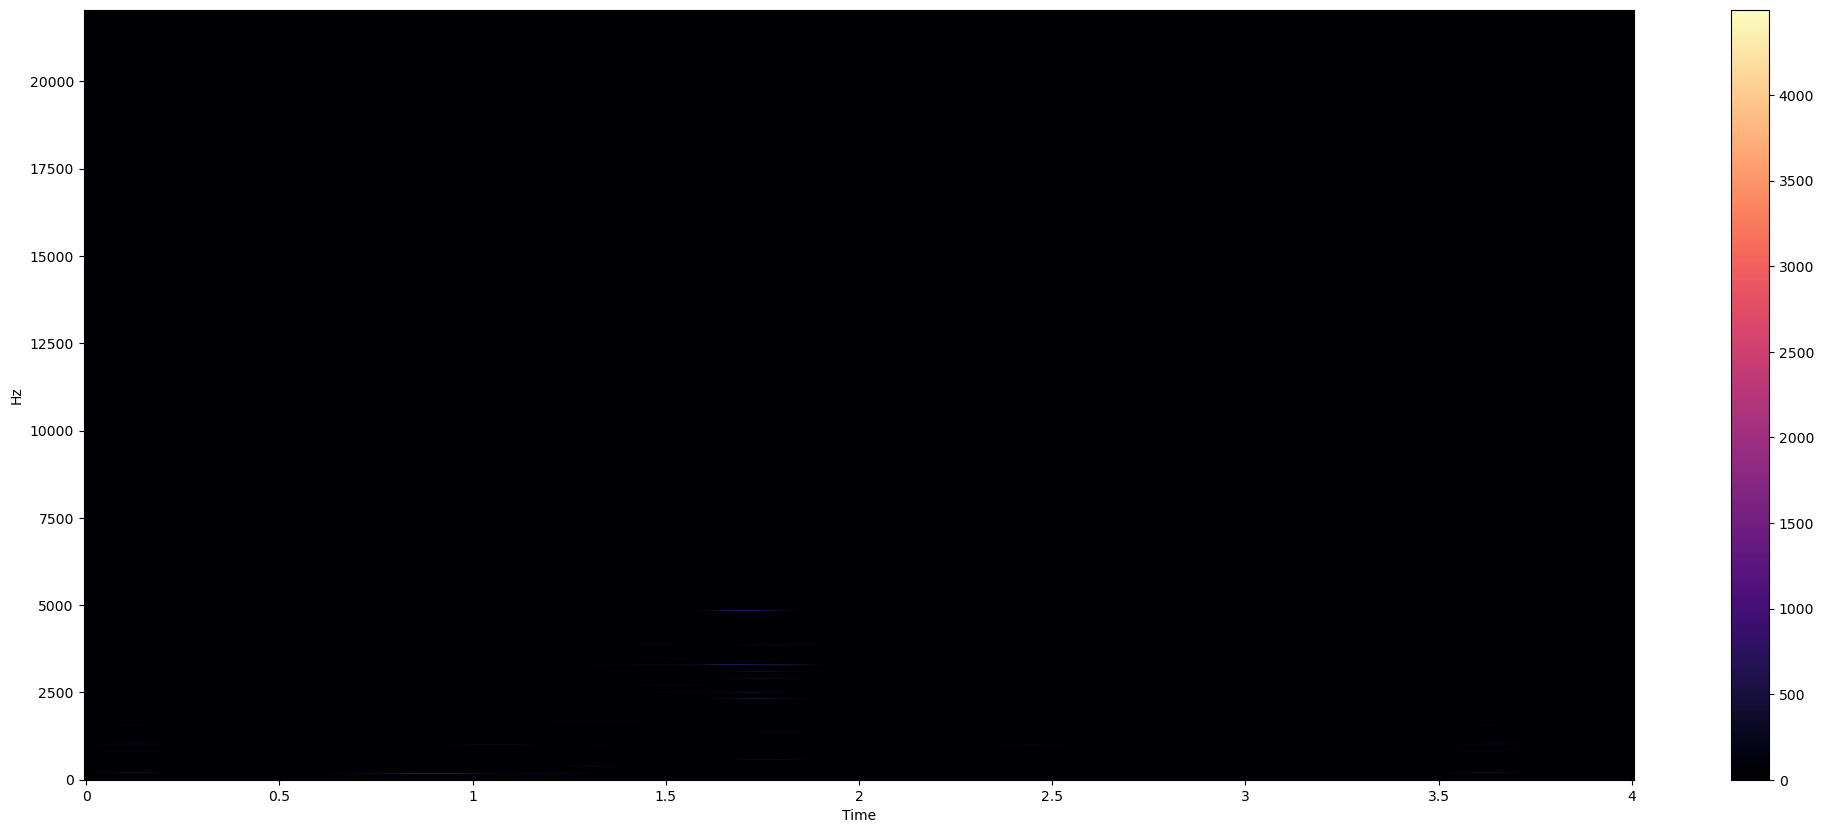

In [218]:
plot_spectrogram(Y_scale,sr,hop_length)

# Com LOG-SPECTROGRAM

Para o exemplo funciona, mas os parametros __8193__ e __321__ pode não ser o mesmo para todos os audios

In [219]:
resample_sr = 44100 #sample rate padrao
desired = 4.0 #tempo do audio padrao
i=0
for f in path_list:
    f = f'{f}'
    y, previous_sr = librosa.load(f, sr=None)
    y_resample =librosa.resample(y, orig_sr=previous_sr, target_sr=sr)
    
    if len(y_resample)<4*sr:
        # Calculate the number of times to repeat the audio
        repeat = int(np.ceil(desired * sr / len(y_resample)))

        # Repeat the audio
        y_extended = np.tile(y_resample, repeat)

        # Trim the array to the desired duration
        y_extended = y_extended[:int(desired * sr)]

    else:
        y_extended = y_resample
        
    min_val = np.min(y_extended)
    max_val = np.max(y_extended)
    ynormalized = (y_extended - min_val) / (max_val - min_val)
        
    dataset[i] = ynormalized[:4* sr]

#Spectogram
    stft = librosa.core.stft(y_extended, hop_length = hop_length, n_fft = n_fft)
    spectrogram = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(spectrogram) 
    dataset_logspectrogram[i] = log_spectrogram
    i+=1

# Como diz no video

In [220]:
Y_logscale = librosa.power_to_db(Y_scale)

In [221]:
Y_logscale.shape

(8193, 321)

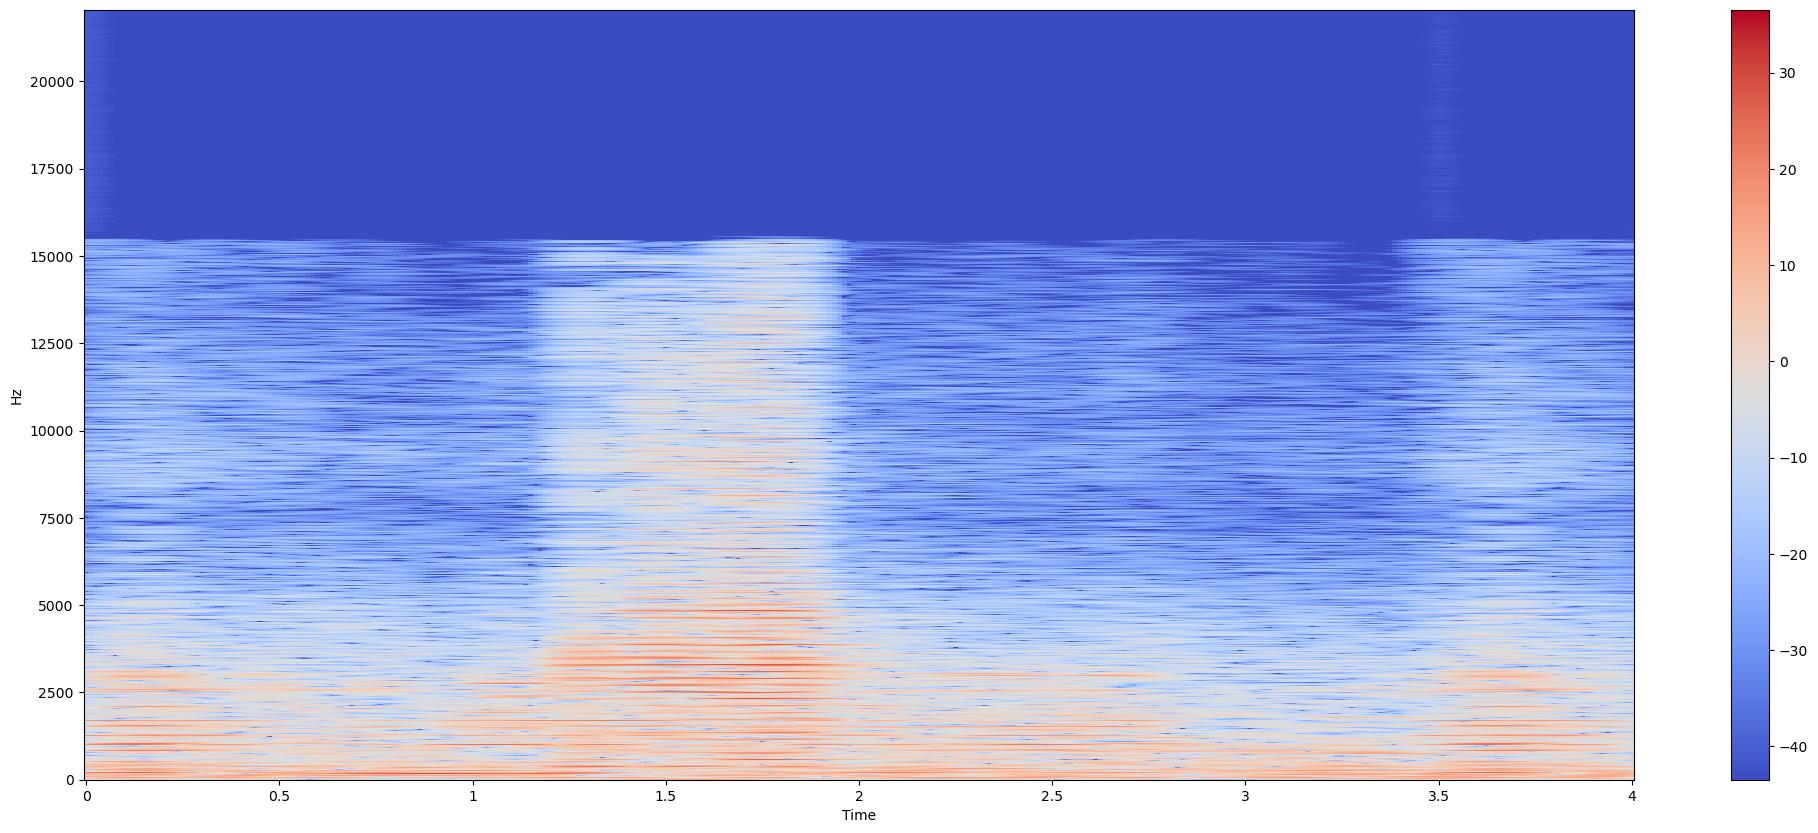

In [222]:
plot_spectrogram(Y_logscale,sr,hop_length)

# Resultado de vários tipos de normalização

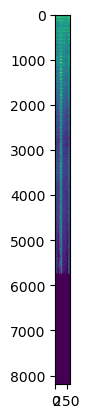

In [226]:
#Com normalizacao min-max
index=0
plt.figure()
plt.imshow(dataset_logspectrogram[index])
plt.show()

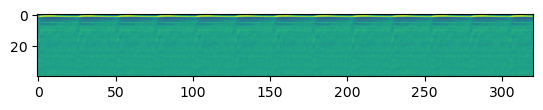

In [67]:
#Com normalizacao z-score
index=0
plt.figure()
plt.imshow(dataset_mfcc[index])
plt.show()

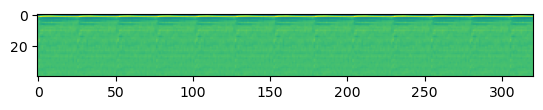

In [69]:
#Com normalizacao de amplitude maxima
index=0
plt.figure()
plt.imshow(dataset_mfcc[index])
plt.show()

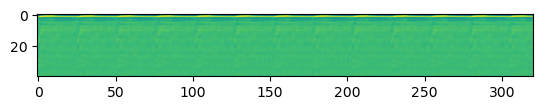

In [71]:
#Com normalizacao logaritmica
index=0
plt.figure()
plt.imshow(dataset_mfcc[index])
plt.show()

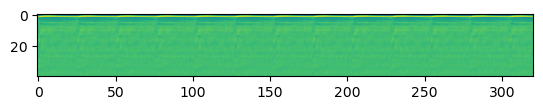

In [73]:
#Com normalizacao Tangente Hiperbólica
index=0
plt.figure()
plt.imshow(dataset_mfcc[index])
plt.show()

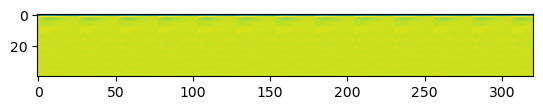

In [75]:
#Com normalizacao L1
index=0
plt.figure()
plt.imshow(dataset_mfcc[index])
plt.show()

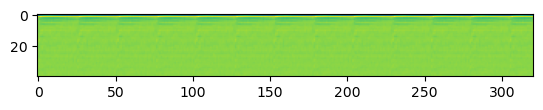

In [77]:
#Com normalizacao L2
index=0
plt.figure()
plt.imshow(dataset_mfcc[index])
plt.show()